# APOD Keyword Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import utilities.methods as met
import utilities.constants as con

## Load Data
Read in the JSON-formatted data into a Pandas `DataFrame`.

In [2]:
df = pd.read_json('./data/APOD.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
date           364 non-null datetime64[ns]
explanation    364 non-null object
media_type     364 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 8.7+ KB


In [4]:
df.head()

,date,explanation,media_type
0,2018-01-01,What's happened to the Sun? Sometimes it look...,video
1,2018-01-02,Why does the Perseus galaxy cluster shine so s...,image
2,2018-01-03,Will our Sun look like this one day? The Heli...,image
3,2018-01-04,"The Crab Nebula is cataloged as M1, the first ...",image
4,2018-01-05,"A jewel of the southern sky, the Great Carina ...",image


## Feature Extraction
Create a list of keywords related to astronomy. Search for them in each explanation. Create columns for each keyword and tag whether that keyword is in the explanation or not.

In [5]:
met.tag_keywords(df, con.KEYWORDS)
print(f'The keywords are: {con.KEYWORDS}')

The keywords are: ['sun', 'moon', 'earth', 'mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto', 'galax', 'nebula', 'star']


## Data Exploration
I will explore the keyword value counts for each explanation.

In [6]:
gathered_keywords = met.gather_keywords(df, con.KEYWORDS)

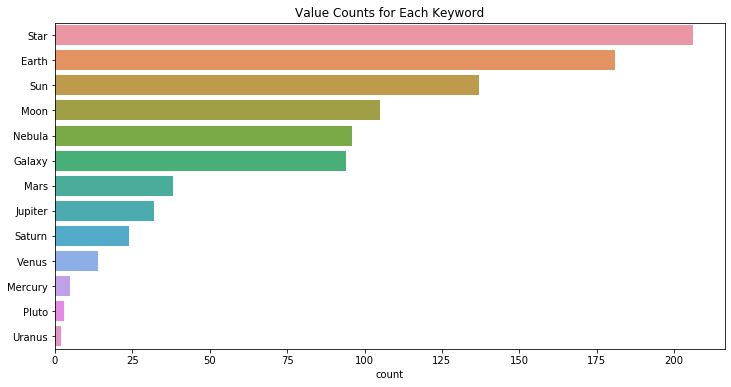

In [7]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(y=gathered_keywords, order=gathered_keywords.value_counts().index, ax=ax)
plt.title('Value Counts for Each Keyword')
plt.show()

### Media Type
This dataset also contains the type of media used for the APOD post.

In [8]:
df['media_type'].value_counts()

image    331
video     33
Name: media_type, dtype: int64

There are two type of media, _image_ and _video_. There are many more images than videos.

Next, I will break the keywords down by media type. I will explore what the trends are in keyword for each media type.

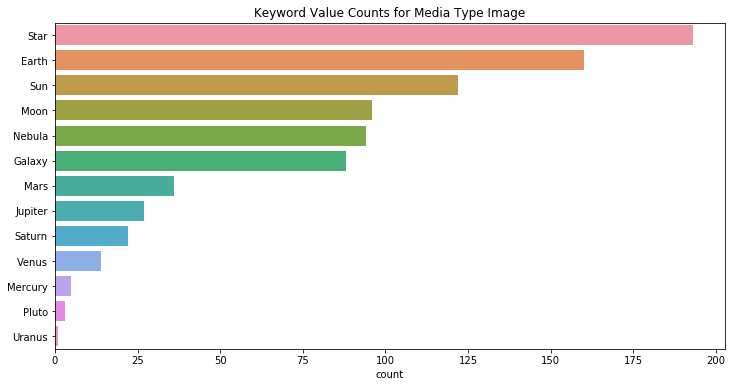

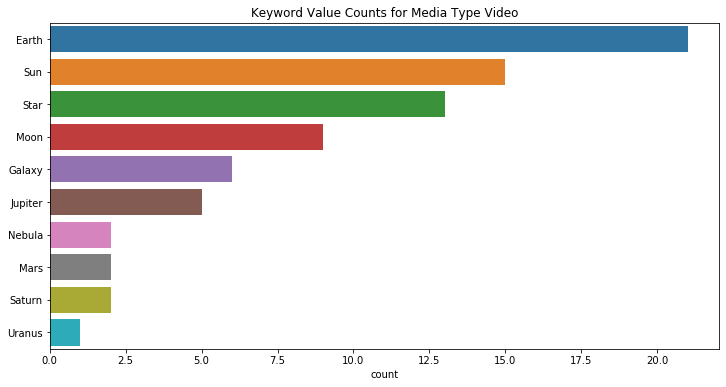

In [9]:
for media_type in df['media_type'].value_counts().index:
    gathered_keywords = met.gather_keywords(df[df['media_type'] == media_type], con.KEYWORDS)
    
    f, ax = plt.subplots(figsize=(12, 6))
    sns.countplot(y=gathered_keywords, order=gathered_keywords.value_counts().index, ax=ax)
    plt.title(f'Keyword Value Counts for Media Type {media_type.title()}')
    plt.show()

## Conclusions
In this project, I scrapped image explanations from Astronomy Picture of the Day. I then analyzed the frequency of certain keywords used in the explanations. I discovered that the most frequently used keyword is _Star_ and the least used keyword is the planet _Uranus_. I then broke down the dataset by media type, _video_ or _image_. I discovered that the most frequent keyword for _image_ is _star_ and the least frequency keyword for _image_ is the planet _Uranus_. The most frequent keyword for _video_ is _Earth_ while the least frequent keyword is _Uranus_.